In [1]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the pandas module
import pandas as pd
#Reading the files and assigning variable names
articles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skills group project/Group 4/articles.APOE.csv")
authors = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skills group project/Group 4/authors.APOE.csv")
paper_count = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skills group project/Group 4/paper_counts.csv")

In [ ]:
#Merging the forename and last name to create a full name for the authors
authors["AuthorFullname"] = authors["AuthorForename"] + " " + authors["AuthorLastname"]
#Importing numpy and matplotlib modules
import numpy as np
import matplotlib.pyplot as plt
#Creating a dataframe with PMID and full name columns only
network_analysis = authors[["PMID", "AuthorFullname"]]

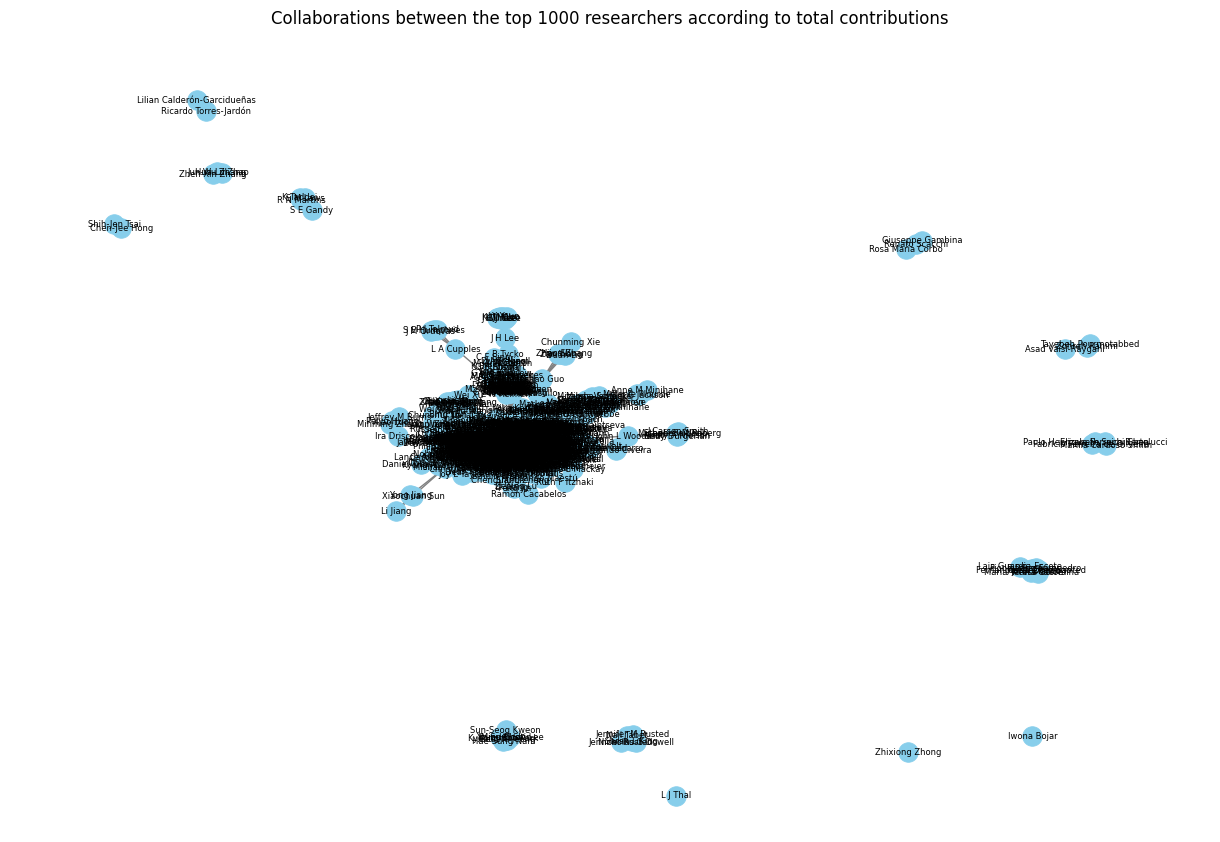

In [44]:
#Performing network analysis on the top 1000 researchers according to number of collaborations
#Just to show that there are clusters and competition when we look on a large scale
#We only looked at 1000 to reduce computational time
#Importing the networkx module
import networkx as nx
#Calculating the top 1000 authors according to occurrence in the dataset
top_authors = network_analysis["AuthorFullname"].value_counts().nlargest(1000).index
#Creating a dataframe with only the top 1000 authors in it for the network analysis
df_top1000 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors)]
#Creating space for the graph
G = nx.Graph()
#Looping over the PMIDs
for pmid, group in df_top1000.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.spring_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing the network analysis
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 1000 researchers according to total contributions')
#Displaying the plot
plt.show()

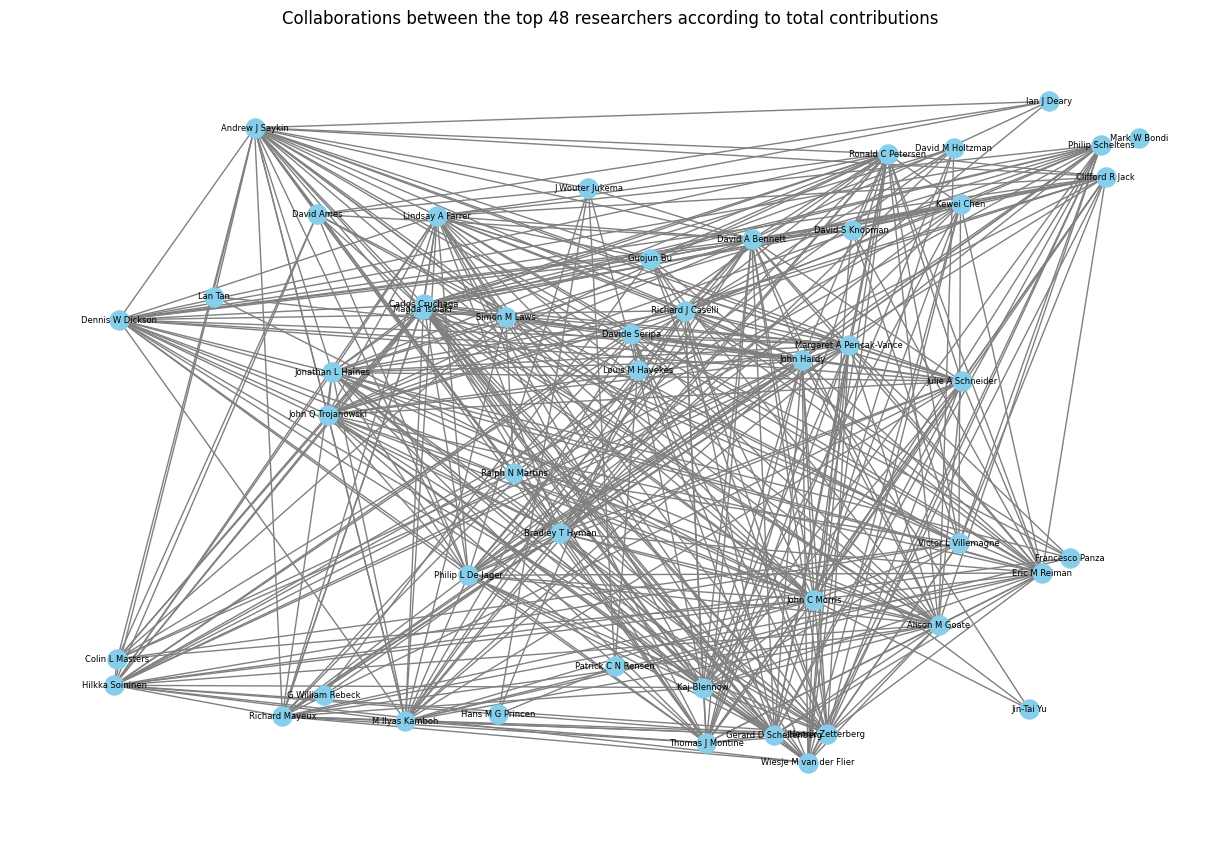

In [45]:
#Calculating the top 48 authors according to occurrence in the dataset
top_authors_48 = network_analysis["AuthorFullname"].value_counts().nlargest(48).index
#Creating a dataframe with only the top 48 authors in it for the network analysis
df_top48 = network_analysis[network_analysis["AuthorFullname"].isin(top_authors_48)]
#Creating space for the graph
G = nx.Graph()
#Looping over the PMIDs
for pmid, group in df_top48.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.random_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing the network analysis
nx.draw(G, pos, with_labels=True, font_size=6, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 48 researchers according to total contributions')
#Displaying the plot
plt.show()

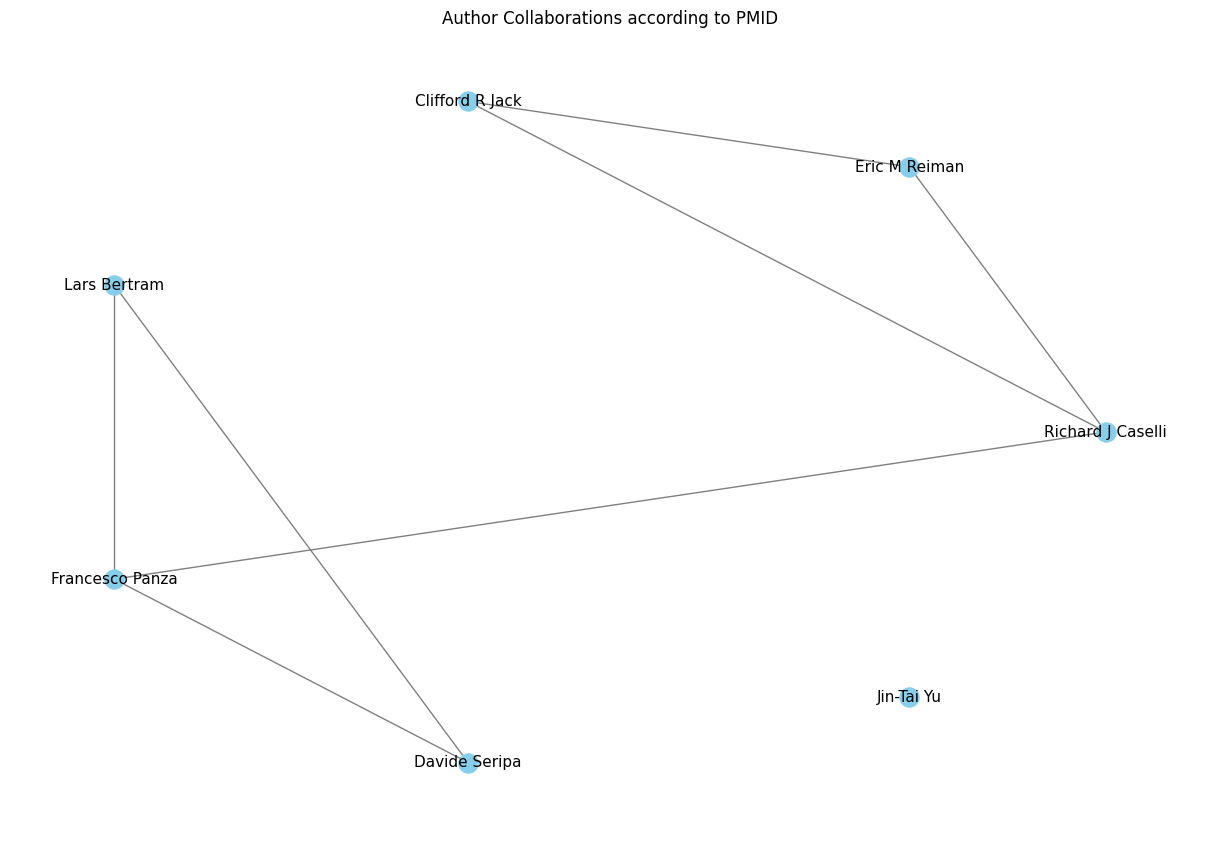

In [43]:
#Creating space for the graph
G = nx.Graph()
#Listing the top researchers that were in the top 48 for both first authorship and total contribution (7 authors)
top_researchers = ["Richard J Caselli", "Francesco Panza", "Lars Bertram", "Eric M Reiman", "Clifford R Jack", "Davide Seripa", "Jin-Tai Yu"]
#Creating a dataframe with only the top 7 authors in it for the network analysis
top_researchers_ = network_analysis[network_analysis["AuthorFullname"].isin(top_researchers)]
#Looping over the PMIDs
for pmid, group in top_researchers_.groupby('PMID'):
    #Setting authors variable as the authors full name in the dataframe
    authors = group['AuthorFullname'].tolist()
    #Looping over each author
    for author1 in authors:
        #Considering relationship between 2 authors
        for author2 in authors:
            #Creating nodes depending on the relationships between the authors
            if author1 != author2:
              G.add_edge(author1, author2)
            else:
              G.add_node(author1)
#Setting the layout of the network analysis
pos = nx.circular_layout(G)
#Creating a figure
fig = plt.figure(figsize=(12, 8))
#Performing network analysis
nx.draw(G, pos, with_labels=True, font_size=11, font_color='black',
        node_size=200, node_color='skyblue', edge_color='grey', linewidths=0.5)
#Setting a title for the plot
plt.title('Collaborations between the top 7 researchers according to first authorship and totl')
#Displaying the plot
plt.show()